<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2026-02-17 20:38:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  38.4MB/s    in 4.0s    

2026-02-17 20:38:34 (38.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



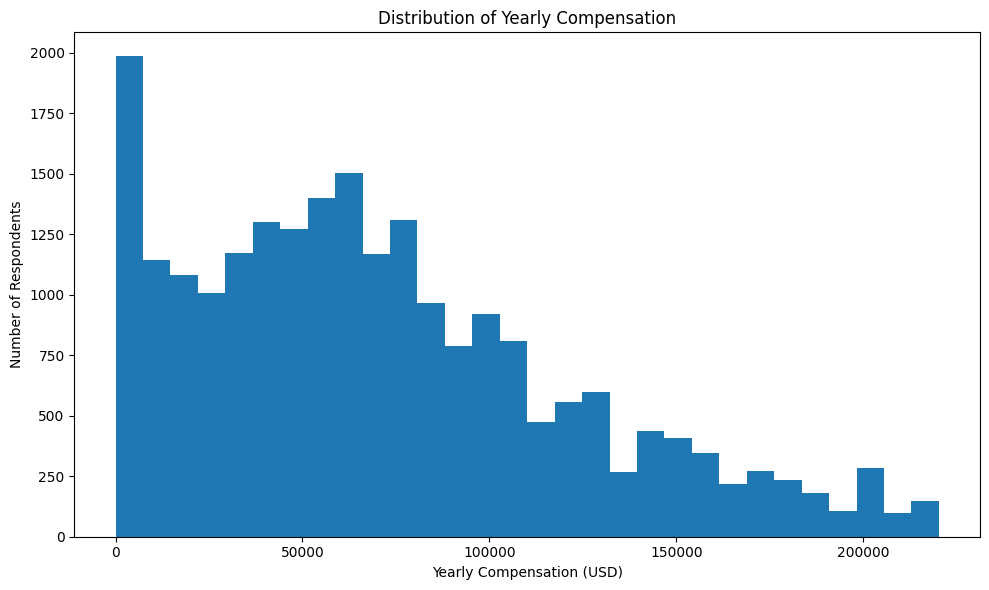

In [4]:
#create a database from the dataframe
import sqlite3

conn = sqlite3.connect("survey-data.sqlite")

df.to_sql("survey", conn, if_exists="replace", index=False)

QUERY = """
SELECT ConvertedCompYearly
FROM survey
WHERE ConvertedCompYearly IS NOT NULL
"""
df_conv = pd.read_sql_query(QUERY, conn)

upper  = df_conv['ConvertedCompYearly'].quantile(0.75) + 1.5 * (df_conv['ConvertedCompYearly'].quantile(0.75) - df_conv['ConvertedCompYearly'].quantile(0.25)) # set upper limit of interquartile range
df_conv = df_conv[df_conv['ConvertedCompYearly'] <= upper] # exclude ConvertedCompYearly where it is above the upper limit of the interquartile range

#create bar chart
plt.figure(figsize=(10, 6))

plt.hist(
    df_conv["ConvertedCompYearly"],
    bins=30
)

plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Yearly Compensation")

plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



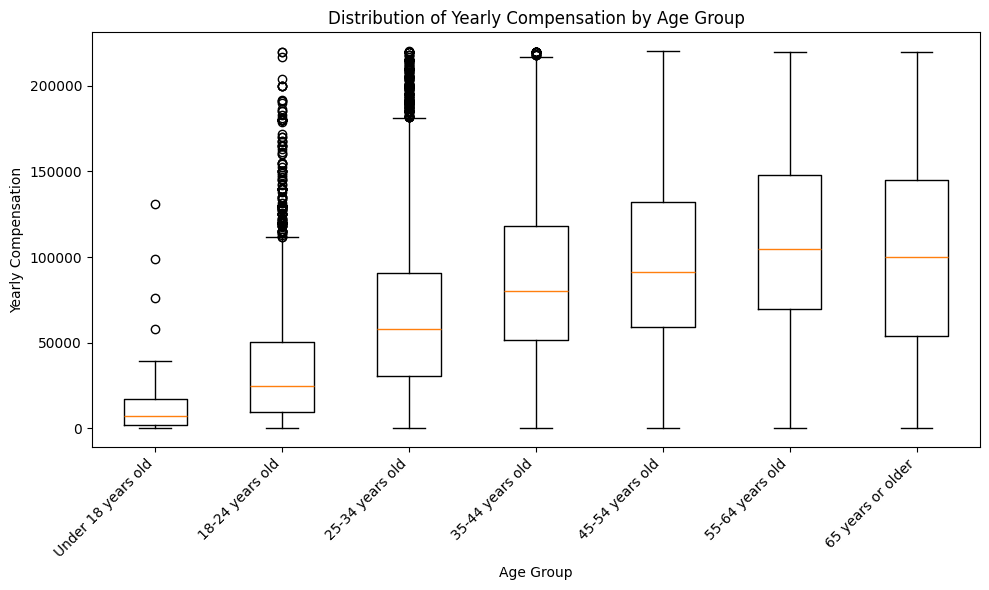

In [5]:
QUERY = """
SELECT Age, ConvertedCompYearly
FROM survey
WHERE Age IS NOT NULL
  AND Age NOT IN('Prefer not to say')
  AND ConvertedCompYearly IS NOT NULL
"""
df_conv_age = pd.read_sql_query(QUERY, conn)

upper  = df_conv_age['ConvertedCompYearly'].quantile(0.75) + 1.5 * (df_conv_age['ConvertedCompYearly'].quantile(0.75) - df_conv_age['ConvertedCompYearly'].quantile(0.25)) # set upper limit of interquartile range
df_conv_age = df_conv_age[df_conv_age['ConvertedCompYearly'] <= upper] # exclude ConvertedCompYearly where it is above the upper limit of the interquartile range

age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65
}

df_conv_age['Age_numeric'] = df_conv_age['Age'].map(age_mapping) # create new column with mapped age

df_conv_age = df_conv_age.dropna()

df_conv_age[["Age", "Age_numeric"]].drop_duplicates().sort_values("Age_numeric")

# create boxplot
plt.figure(figsize=(10, 6))

plt.boxplot(
    [
        df_conv_age.loc[df_conv_age["Age_numeric"] == i, "ConvertedCompYearly"]
        for i in sorted(age_mapping.values())
    ],
    tick_labels=age_mapping.keys()
)

plt.xlabel('Age Group')
plt.ylabel('Yearly Compensation')
plt.title('Distribution of Yearly Compensation by Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



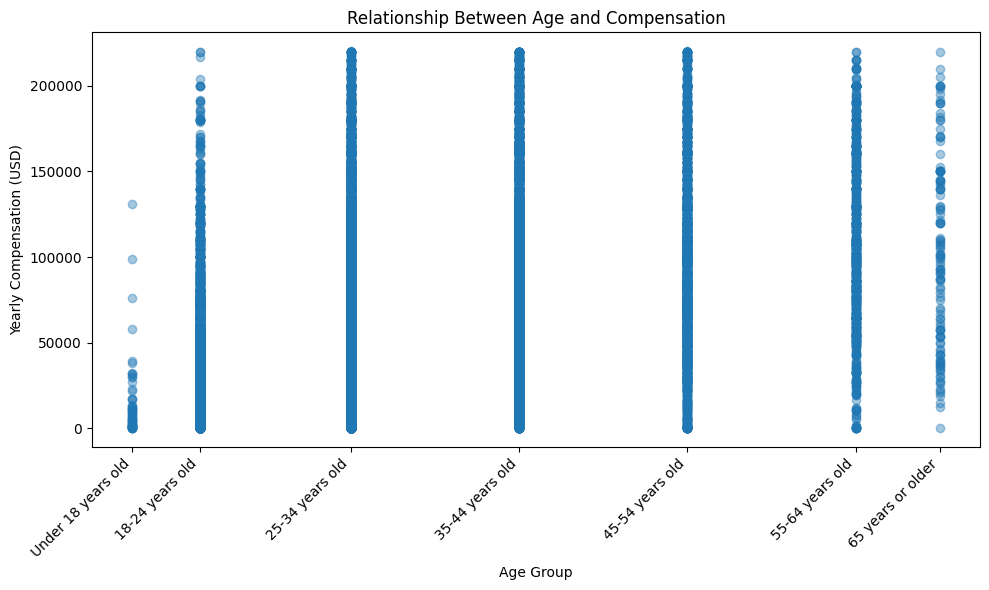

In [6]:
QUERY = """
SELECT Age, ConvertedCompYearly
FROM survey
WHERE Age IS NOT NULL
  AND Age NOT IN('Prefer not to say')
  AND ConvertedCompYearly IS NOT NULL
"""
df_conv_age = pd.read_sql_query(QUERY, conn)

upper  = df_conv_age['ConvertedCompYearly'].quantile(0.75) + 1.5 * (df_conv_age['ConvertedCompYearly'].quantile(0.75) - df_conv_age['ConvertedCompYearly'].quantile(0.25)) # set upper limit of interquartile range
df_conv_age = df_conv_age[df_conv_age['ConvertedCompYearly'] <= upper] # exclude ConvertedCompYearly where it is above the upper limit of the interquartile range

age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65
}

df_conv_age['Age_numeric'] = df_conv_age['Age'].map(age_mapping) # create new column with mapped age

df_conv_age = df_conv_age.dropna()

#create scatterplot

plt.figure(figsize=(10,6))

plt.scatter(
    df_conv_age["Age_numeric"],
    df_conv_age["ConvertedCompYearly"],
    alpha=0.4
)

plt.xticks(
    list(age_mapping.values()),
    list(age_mapping.keys()),
    rotation=45,
    ha="right"
)

plt.xlabel("Age Group")
plt.ylabel("Yearly Compensation (USD)")
plt.title("Relationship Between Age and Compensation")
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


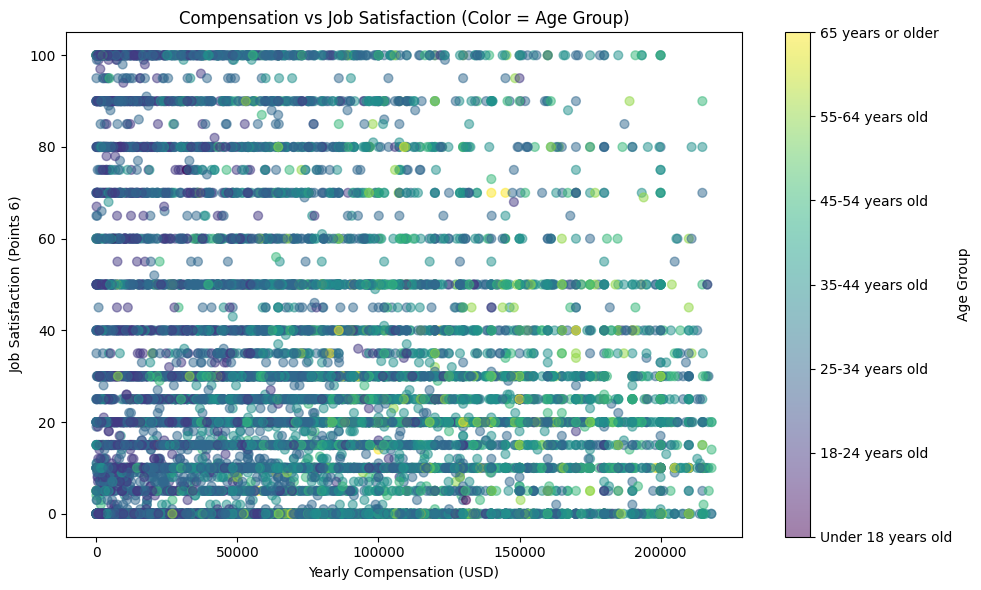

In [7]:
QUERY = """
SELECT ConvertedCompYearly, JobSatPoints_6, Age
FROM survey
WHERE ConvertedCompYearly IS NOT NULL
    AND Age IS NOT NULL
    AND Age NOT IN ('Prefer not to say')
    AND JobSatPoints_6 IS NOT NULL
"""
df_conv_sat = pd.read_sql_query(QUERY, conn)

df_conv_sat = df_conv_sat.dropna() # drop nulls

upper  = df_conv_sat['ConvertedCompYearly'].quantile(0.75) + 1.5 * (df_conv_sat['ConvertedCompYearly'].quantile(0.75) - df_conv_sat['ConvertedCompYearly'].quantile(0.25)) # set upper limit of interquartile range
df_conv_sat = df_conv_sat[df_conv_sat['ConvertedCompYearly'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

age_mapping = {
    "Under 18 years old": 1,
    "18-24 years old": 2,
    "25-34 years old": 3,
    "35-44 years old": 4,
    "45-54 years old": 5,
    "55-64 years old": 6,
    "65 years or older": 7
}

df_conv_sat["Age_numeric"] = df_conv_sat["Age"].map(age_mapping)

# create bubble plot
plt.figure(figsize=(10,6))

conv_sat = plt.scatter(
    df_conv_sat["ConvertedCompYearly"],
    df_conv_sat["JobSatPoints_6"],
    c=df_conv_sat["Age_numeric"],
    cmap="viridis",
    alpha=0.5,
    s=40
)

cbar = plt.colorbar(conv_sat)
cbar.set_ticks(list(age_mapping.values()))
cbar.set_ticklabels(list(age_mapping.keys()))
cbar.set_label("Age Group")

plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (Points 6)")
plt.title("Compensation vs Job Satisfaction (Color = Age Group)")
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



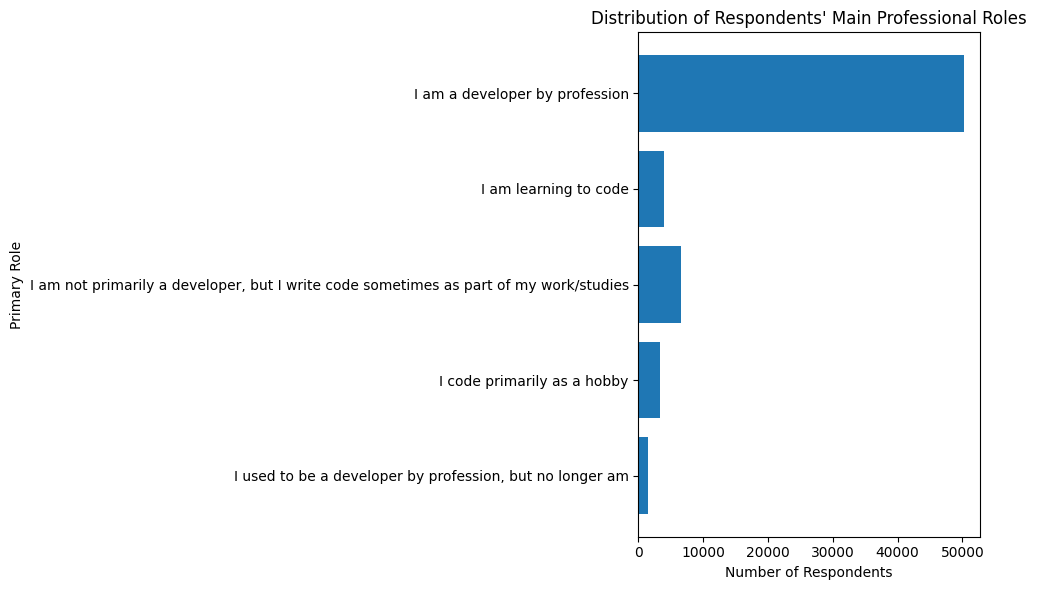

In [8]:
# Horizontal Bar Chart of MainBranch Distribution
QUERY = """
SELECT MainBranch, Count(*) As Count
FROM survey
WHERE MainBranch IS NOT NULL
GROUP BY MainBranch
"""
df_branch = pd.read_sql_query(QUERY, conn)

#Create horizontal bar chart
plt.figure(figsize=(10,6))

plt.barh(
    df_branch.MainBranch,
    df_branch.Count
)

plt.xlabel("Number of Respondents")
plt.ylabel("Primary Role")
plt.title("Distribution of Respondents' Main Professional Roles")
plt.gca().invert_yaxis()   # highest on top

plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



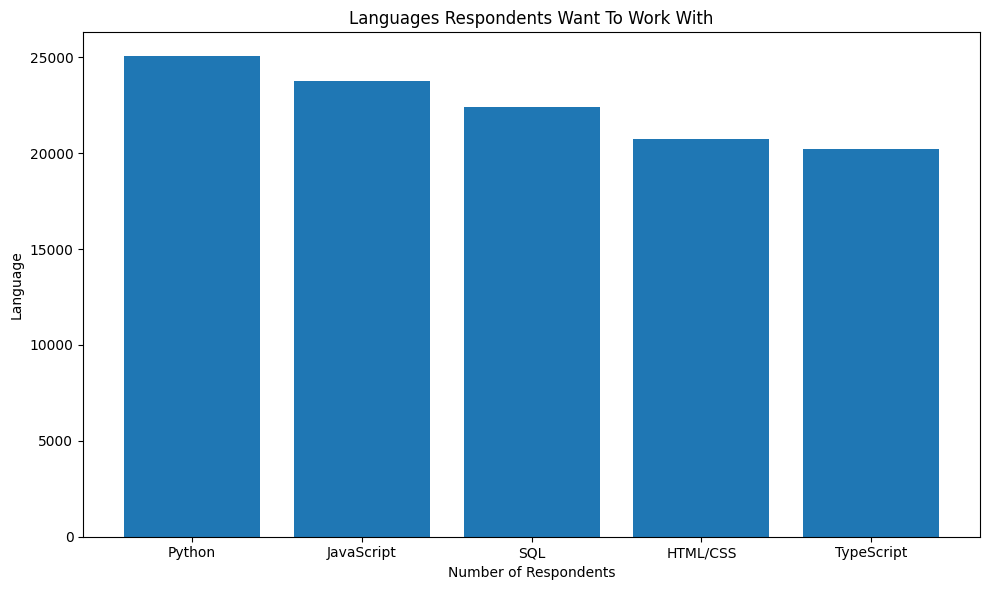

In [9]:
QUERY = """
SELECT LanguageWantToWorkWith
FROM survey
WHERE LanguageWantToWorkWith IS NOT NULL
"""
df_want = pd.read_sql_query(QUERY, conn)

# split, explode and count languages
df_want = (
    df_want['LanguageWantToWorkWith']
    .str.split(';')
    .explode()
    .str.strip()        # clean whitespace
    .value_counts()
    .head(5)
)

#Create horizontal bar chart
plt.figure(figsize=(10,6))

plt.bar(
    df_want.index,
    df_want.values
)

plt.xlabel("Number of Respondents")
plt.ylabel("Language")
plt.title("Languages Respondents Want To Work With")
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


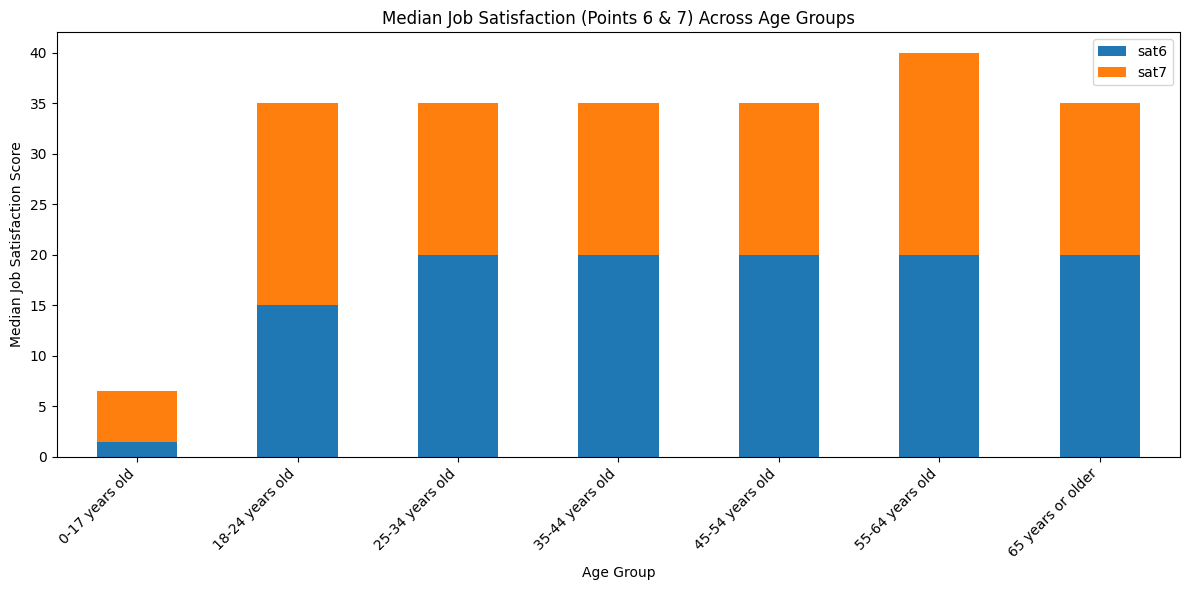

In [10]:
QUERY = """
SELECT JobSatPoints_6, JobSatPoints_7, Age
FROM survey
WHERE JobSatPoints_6 IS NOT NULL
    AND JobSatPoints_7 IS NOT NULL
    AND Age IS NOT NULL
    AND Age NOT IN ('Prefer not to say')
"""
df_sat_age = pd.read_sql_query(QUERY, conn)

# rename age
df_sat_age['Age'] = df_sat_age['Age'].replace({
    'Under 18 years old':
        '0-17 years old'
})

df_sat_age = (
    df_sat_age
    .groupby("Age")
    .agg(
        sat6=("JobSatPoints_6", "median"),
        sat7=("JobSatPoints_7", "median")
    )
)
#Create horizontal bar chart
# create stacked bar chart
df_sat_age.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction Score")
plt.title("Median Job Satisfaction (Points 6 & 7) Across Age Groups")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



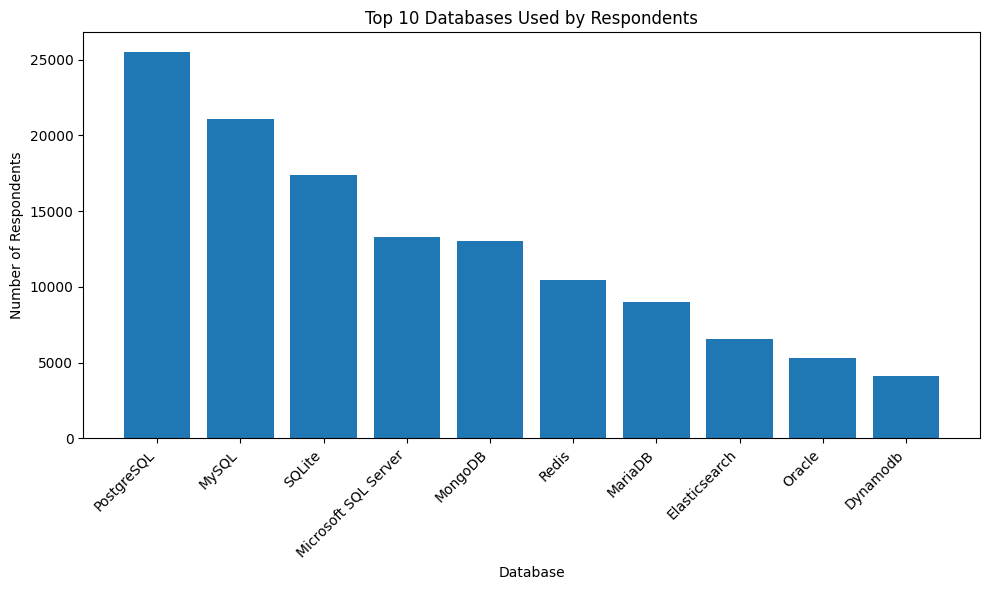

In [11]:
QUERY = """
SELECT DatabaseHaveWorkedWith
FROM survey
WHERE DatabaseHaveWorkedWith IS NOT NULL
"""
df_db = pd.read_sql_query(QUERY, conn)

# split, explode and count languages
df_db = (
    df_db['DatabaseHaveWorkedWith']
    .str.split(';')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
)

#Create horizontal bar chart
plt.figure(figsize=(10,6))

plt.bar(
    df_db.index,
    df_db.values
)

plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.title("Top 10 Databases Used by Respondents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



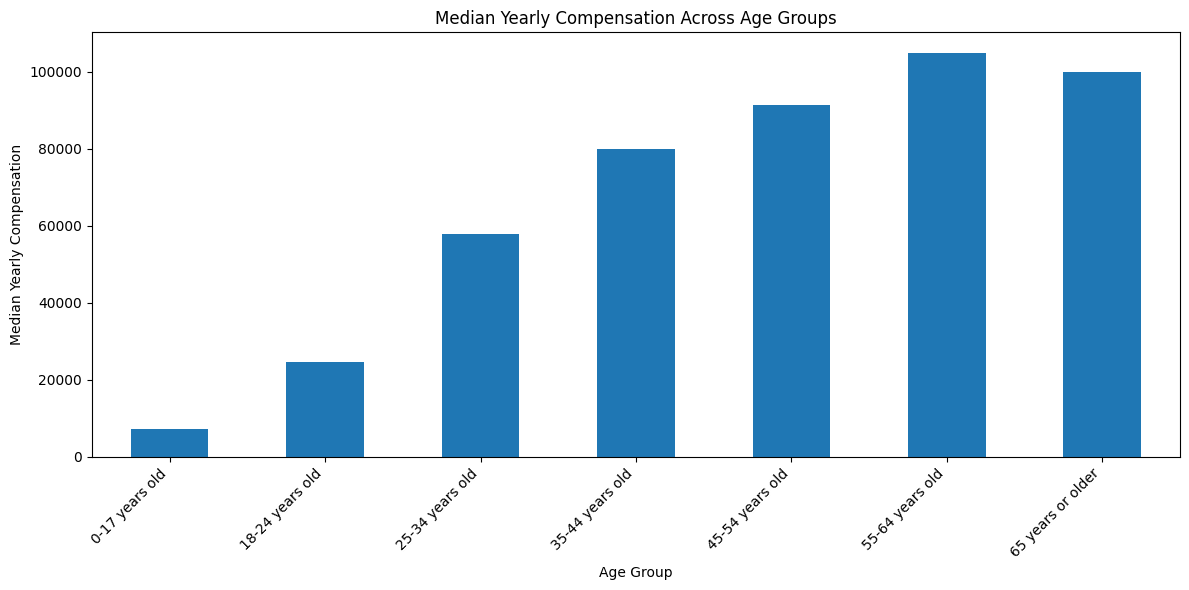

In [12]:
QUERY = """
SELECT ConvertedCompYearly, Age
FROM survey
WHERE ConvertedCompYearly IS NOT NULL
    AND Age IS NOT NULL
    AND Age NOT IN ('Prefer not to say')
"""
df_conv_age = pd.read_sql_query(QUERY, conn)

# rename age
df_conv_age['Age'] = df_conv_age['Age'].replace({
    'Under 18 years old':
        '0-17 years old'
})

upper  = df_conv_age['ConvertedCompYearly'].quantile(0.75) + 1.5 * (df_conv_age['ConvertedCompYearly'].quantile(0.75) - df_conv_age['ConvertedCompYearly'].quantile(0.25)) # set upper limit of interquartile range
df_conv_age = df_conv_age[df_conv_age['ConvertedCompYearly'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

df_conv_age = (
    df_conv_age
    .groupby("Age")
    .agg(
        conv=("ConvertedCompYearly", "median")
    )
)
#Create horizontal bar chart
# create stacked bar chart
df_conv_age.plot(
    kind="bar",
    figsize=(12, 6)
)

plt.xlabel("Age Group")
plt.ylabel("Median Yearly Compensation")
plt.title("Median Yearly Compensation Across Age Groups")
plt.xticks(rotation=45, ha="right")
plt.legend('', frameon=False)
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



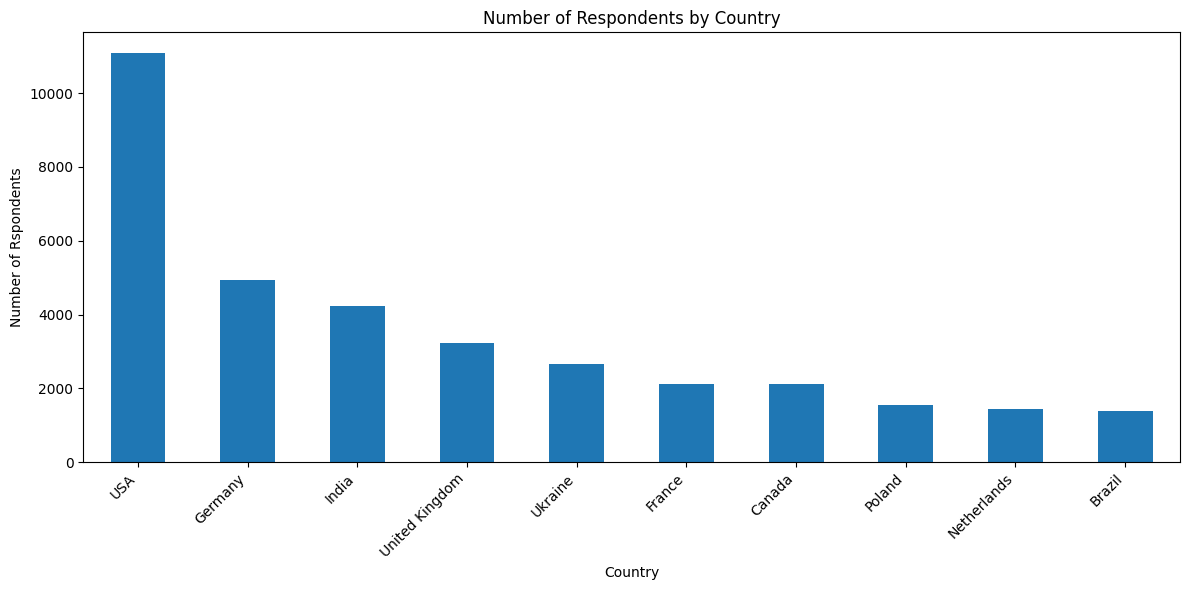

In [13]:
QUERY = """
SELECT Country
FROM survey
WHERE Country IS NOT NULL
"""
df_country = pd.read_sql_query(QUERY, conn)

# rename countries
df_country['Country'] = df_country['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland':
        'United Kingdom',
    'United States of America':
        'USA'
})

df_country = df_country["Country"].value_counts().head(10)

# create bar chart
df_country.plot(
    kind="bar",
    figsize=(12, 6)
)

plt.xlabel("Country")
plt.ylabel("Number of Rspondents")
plt.title("Number of Respondents by Country")
plt.xticks(rotation=45, ha="right")
plt.legend('', frameon=False)
plt.tight_layout()
plt.show()

conn.close()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
